# Evaluation Metrics for Classification: Loan Default Example
This notebook demonstrates key evaluation metrics for classification models, including accuracy, precision, recall, F1 score, AUC-ROC, and confusion matrix. We use a mock dataset for a loan default prediction scenario. Each metric is explained with its use case.

In [2]:
# Import Required Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

## Create Mock Loan Default Dataset
We will generate a synthetic dataset representing loan applicants. Features include income and credit score, and the target variable indicates whether the applicant defaulted on the loan (1) or not (0).

In [3]:
# Generate mock data for loan default
np.random.seed(42)
n_samples = 1000
income = np.random.normal(50000, 15000, n_samples)
credit_score = np.random.normal(650, 70, n_samples)
# Simulate default: higher risk for low income and low credit score
risk = 0.3 * (income < 40000) + 0.4 * (credit_score < 600) + np.random.rand(n_samples) * 0.2
default = (risk > 0.5).astype(int)
data = pd.DataFrame({
    'income': income,
    'credit_score': credit_score,
    'default': default
})
data.head()

,income,credit_score,default
0,57450.712295,747.954881,0
1,47926.035482,714.724358,0
2,59715.328072,654.174126,0
3,72845.447846,604.714426,0
4,46487.699379,698.875632,0


## Split Data into Train and Test Sets
We split the dataset into training and testing sets to evaluate model performance on unseen data.

In [4]:
# Split features and target
y = data['default']
X = data[['income', 'credit_score']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Train set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Train set size: 700
Test set size: 300


## Train a Classification Model
We will train a Logistic Regression model to predict loan default based on income and credit score.

In [5]:
# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

## Display Confusion Matrix
The **confusion matrix** shows the counts of true positives, false positives, true negatives, and false negatives.

- **True Positive (TP):** Model predicts default, and the applicant actually defaulted.
- **False Positive (FP):** Model predicts default, but the applicant did not default.
- **True Negative (TN):** Model predicts no default, and the applicant did not default.
- **False Negative (FN):** Model predicts no default, but the applicant actually defaulted.

**Use case:** The confusion matrix helps understand the types of errors the model makes and is useful for model diagnostics.

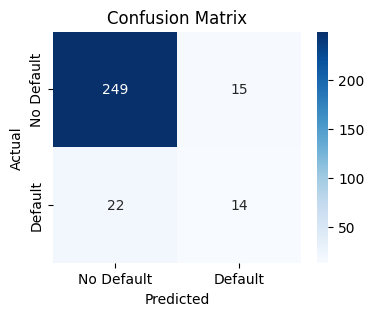

In [6]:
# Compute and display confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Calculate Accuracy
**Accuracy** measures the proportion of correct predictions (both defaults and non-defaults) out of all predictions.

**Use case:** Accuracy is useful when the classes are balanced and the cost of false positives and false negatives is similar.

In [7]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.88


## Calculate Precision
**Precision** measures the proportion of positive identifications (predicted defaults) that were actually correct.

**Use case:** Precision is important when the cost of false positives is high, such as approving risky loans to applicants who may default.

In [8]:
# Calculate precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

Precision: 0.48


## Calculate Recall
**Recall** measures the proportion of actual positives (true defaults) that were correctly identified by the model.

**Use case:** Recall is important when missing a positive case is costly, such as failing to identify a likely defaulter.

In [9]:
# Calculate recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

Recall: 0.39


## Calculate F1 Score
**F1 Score** is the harmonic mean of precision and recall. It provides a single metric that balances both concerns.

**Use case:** F1 score is useful when you need a balance between precision and recall, especially with imbalanced classes.

In [10]:
# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.43


## Calculate AUC-ROC
**AUC-ROC (Area Under the Receiver Operating Characteristic Curve)** evaluates the model's ability to distinguish between classes across all thresholds.

**Use case:** AUC-ROC is useful for comparing classifiers and understanding how well the model separates defaulters from non-defaulters.

AUC-ROC: 0.93


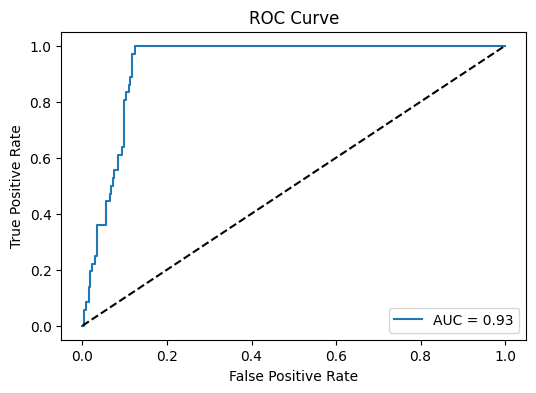

In [ ]:
# Calculate AUC-ROC
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC: {auc:.2f}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

The ROC curve shown here demonstrates that model performs very well at distinguishing between loan defaulters and non-defaulters:

1. Curve Shape: The ROC curve rises steeply towards the top-left corner, which indicates a high true positive rate (sensitivity) and a low false positive rate for most thresholds. This is the ideal shape for a good classifier.

2. AUC Value: The Area Under the Curve (AUC) is 0.93, which is considered excellent. An AUC of 1.0 means perfect classification, while 0.5 means the model is no better than random guessing. Your model’s AUC of 0.93 suggests it is highly effective at ranking positive cases higher than negative ones.

3. Interpretation: The high AUC and the curve’s proximity to the top-left corner mean your model is very good at separating the two classes overall, regardless of the threshold chosen.

## Calculate Precision-Recall (PR) Curve
The **Precision-Recall (PR) curve** shows the trade-off between precision and recall for different threshold values.

- **Precision:** Out of all predicted positives, how many are actually positive?
- **Recall:** Out of all actual positives, how many did we correctly identify?

**Use case:** The PR curve is especially useful for imbalanced datasets, where the positive class is rare. It helps visualize how well the model identifies the positive class without being misled by a large number of true negatives.

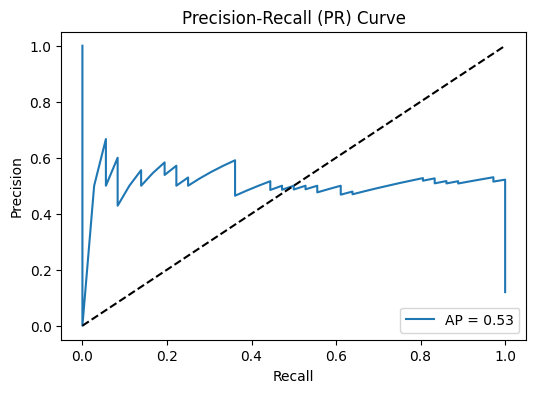

In [ ]:
# Plot Precision-Recall (PR) curve
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
avg_precision = average_precision_score(y_test, y_pred_proba)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'AP = {avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall (PR) Curve')
plt.legend()
plt.show()

The Precision-Recall (PR) curve here provides several important insights about model’s performance, especially for the positive class (loan default):

1. Average Precision (AP): The AP value of about 0.53 indicates that, on average, the model is moderately good at identifying true defaults among all predicted defaults. An AP of 1.0 would be perfect, while 0.5 is similar to random guessing for a balanced dataset.

2. Precision-Recall Trade-off: The curve shows that as recall increases (the model identifies more actual defaulters), precision tends to decrease (more false positives among predicted defaulters). This is a typical pattern: catching more positives often means including more incorrect ones.

3. Model Usefulness: The curve is not close to the top-right corner, which would indicate both high precision and high recall. This suggests the model has room for improvement, especially if high precision or high recall is required for your application.

4. Imbalanced Data: PR curves are especially useful for imbalanced datasets. If your dataset has far fewer defaults than non-defaults, the PR curve gives a more informative picture than accuracy or ROC curves. Here, the moderate AP suggests the model is not simply being misled by the majority class.